### Table of Contents

EDA
Data Pre Processing
Feature Encoding
Model Building

Knn
Decision Tree Classifier
Random Forest Classifier
Ada Boost Classifier
Gradient Boosting Classifier
Stochastic Gradient Boosting (SGB)
XgBoost
Cat Boost Classifier
Extra Trees Classifier
LGBM Classifier
Models Comparison
https://www.kaggle.com/code/niteshyadav3103/chronic-kidney-disease-prediction-98-accuracy

In [1]:
# necessary imports 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 26)

In [2]:
# loading data

df= pd.read_csv('CKDDataSet.csv')
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,predict
0,40,150,1.020,1,0,normal,normal,not present,notpresent,181,96,8.4,135,4.0,10.3,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,45,140,1.020,4,0,normal,normal,not present,notpresent,121,73,7.3,130,5.4,9.4,38,6000,3.9,no,no,no,good,no,yes,ckd
2,16,160,1.020,2,3,normal,normal,not present,notpresent,423,111,7.0,129,4.9,10.6,31,7500,4.6,no,yes,no,poor,no,no,ckd
3,18,140,1.005,4,0,normal,abnomal,present,notpresent,106,119,11.6,131,5.5,7.2,32,6700,4.4,yes,no,no,poor,yes,yes,ckd
4,51,170,1.010,2,0,normal,normal,present,notpresent,66,144,16.0,128,5.6,9.6,35,7300,5.0,no,no,no,good,no,yes,ckd


In [3]:
df.shape

(500, 25)

In [5]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'predict'],
      dtype='object')

In [10]:
# rename column names to make it more user-friendly

df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [11]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,40,150,1.020,1,0,normal,normal,not present,notpresent,181,96,8.4,135,4.0,10.3,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,45,140,1.020,4,0,normal,normal,not present,notpresent,121,73,7.3,130,5.4,9.4,38,6000,3.9,no,no,no,good,no,yes,ckd
2,16,160,1.020,2,3,normal,normal,not present,notpresent,423,111,7.0,129,4.9,10.6,31,7500,4.6,no,yes,no,poor,no,no,ckd
3,18,140,1.005,4,0,normal,abnomal,present,notpresent,106,119,11.6,131,5.5,7.2,32,6700,4.4,yes,no,no,poor,yes,yes,ckd
4,51,170,1.010,2,0,normal,normal,present,notpresent,66,144,16.0,128,5.6,9.6,35,7300,5.0,no,no,no,good,no,yes,ckd


In [12]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count
count,500.000000,500.000000,499.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,44.480000,122.026000,1.017705,1.16600,0.662000,151.122000,116.456000,6.871800,135.710000,4.818400,11.386400,36.974000,7953.600000,4.471800
std,13.930172,37.651409,0.007538,1.45832,1.192728,80.986002,80.509699,5.520458,6.098219,0.773264,3.006169,8.490082,2351.498699,0.962246
min,14.000000,10.000000,1.005000,0.00000,0.000000,66.000000,10.000000,0.400000,125.000000,3.200000,5.600000,16.000000,3800.000000,2.600000
25%,33.000000,80.000000,1.010000,0.00000,0.000000,98.000000,46.000000,1.175000,130.000000,4.200000,9.100000,31.000000,6300.000000,3.800000
50%,45.000000,130.000000,1.020000,0.00000,0.000000,122.000000,118.000000,6.300000,135.000000,4.900000,10.600000,36.000000,7500.000000,4.600000
75%,55.000000,150.000000,1.025000,2.00000,1.000000,172.000000,180.000000,9.600000,140.000000,5.400000,14.100000,44.000000,9400.000000,5.200000
max,81.000000,170.000000,1.025000,4.00000,4.000000,490.000000,914.000000,18.800000,150.000000,6.700000,17.500000,54.000000,21600.000000,6.500000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      500 non-null    int64  
 1   blood_pressure           500 non-null    int64  
 2   specific_gravity         499 non-null    float64
 3   albumin                  500 non-null    int64  
 4   sugar                    500 non-null    int64  
 5   red_blood_cells          500 non-null    object 
 6   pus_cell                 500 non-null    object 
 7   pus_cell_clumps          500 non-null    object 
 8   bacteria                 500 non-null    object 
 9   blood_glucose_random     500 non-null    int64  
 10  blood_urea               500 non-null    int64  
 11  serum_creatinine         500 non-null    float64
 12  sodium                   500 non-null    int64  
 13  potassium                500 non-null    float64
 14  haemoglobin              5

### As we can see that 'packed_cell_volume', 'white_blood_cell_count' and 'red_blood_cell_count' are object type. We need to change them to numerical dtype.

In [14]:
# converting necessary columns to numerical type

df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      500 non-null    int64  
 1   blood_pressure           500 non-null    int64  
 2   specific_gravity         499 non-null    float64
 3   albumin                  500 non-null    int64  
 4   sugar                    500 non-null    int64  
 5   red_blood_cells          500 non-null    object 
 6   pus_cell                 500 non-null    object 
 7   pus_cell_clumps          500 non-null    object 
 8   bacteria                 500 non-null    object 
 9   blood_glucose_random     500 non-null    int64  
 10  blood_urea               500 non-null    int64  
 11  serum_creatinine         500 non-null    float64
 12  sodium                   500 non-null    int64  
 13  potassium                500 non-null    float64
 14  haemoglobin              5

In [16]:
# Extracting categorical and numerical columns

cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [17]:
# looking at unique values in categorical columns

for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has ['normal' 'abnormal'] values

pus_cell has ['normal' 'abnomal' 'abnormal'] values

pus_cell_clumps has ['not present' 'not present         ' 'present' 'notpresent'] values

bacteria has ['notpresent' 'present'] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no'] values

coronary_artery_disease has ['no' 'yes'] values

appetite has ['good' 'poor' 'good '] values

peda_edema has ['no' 'yes' 'yesno'] values

aanemia has ['no' 'yes'] values

class has ['ckd' 'not ckd' 'notckd'] values



### There is some ambugity present in the columns we have to remove that.


In [18]:
# replace incorrect values

df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [19]:
df['class'] = df['class'].map({'ckd': 0, 'not ckd': 1})
df['class'] = pd.to_numeric(df['class'], errors='coerce')

In [20]:
df['class'] = df['class'].map({'ckd': 0, 'not ckd': 1})
df['class'] = pd.to_numeric(df['class'], errors='coerce')

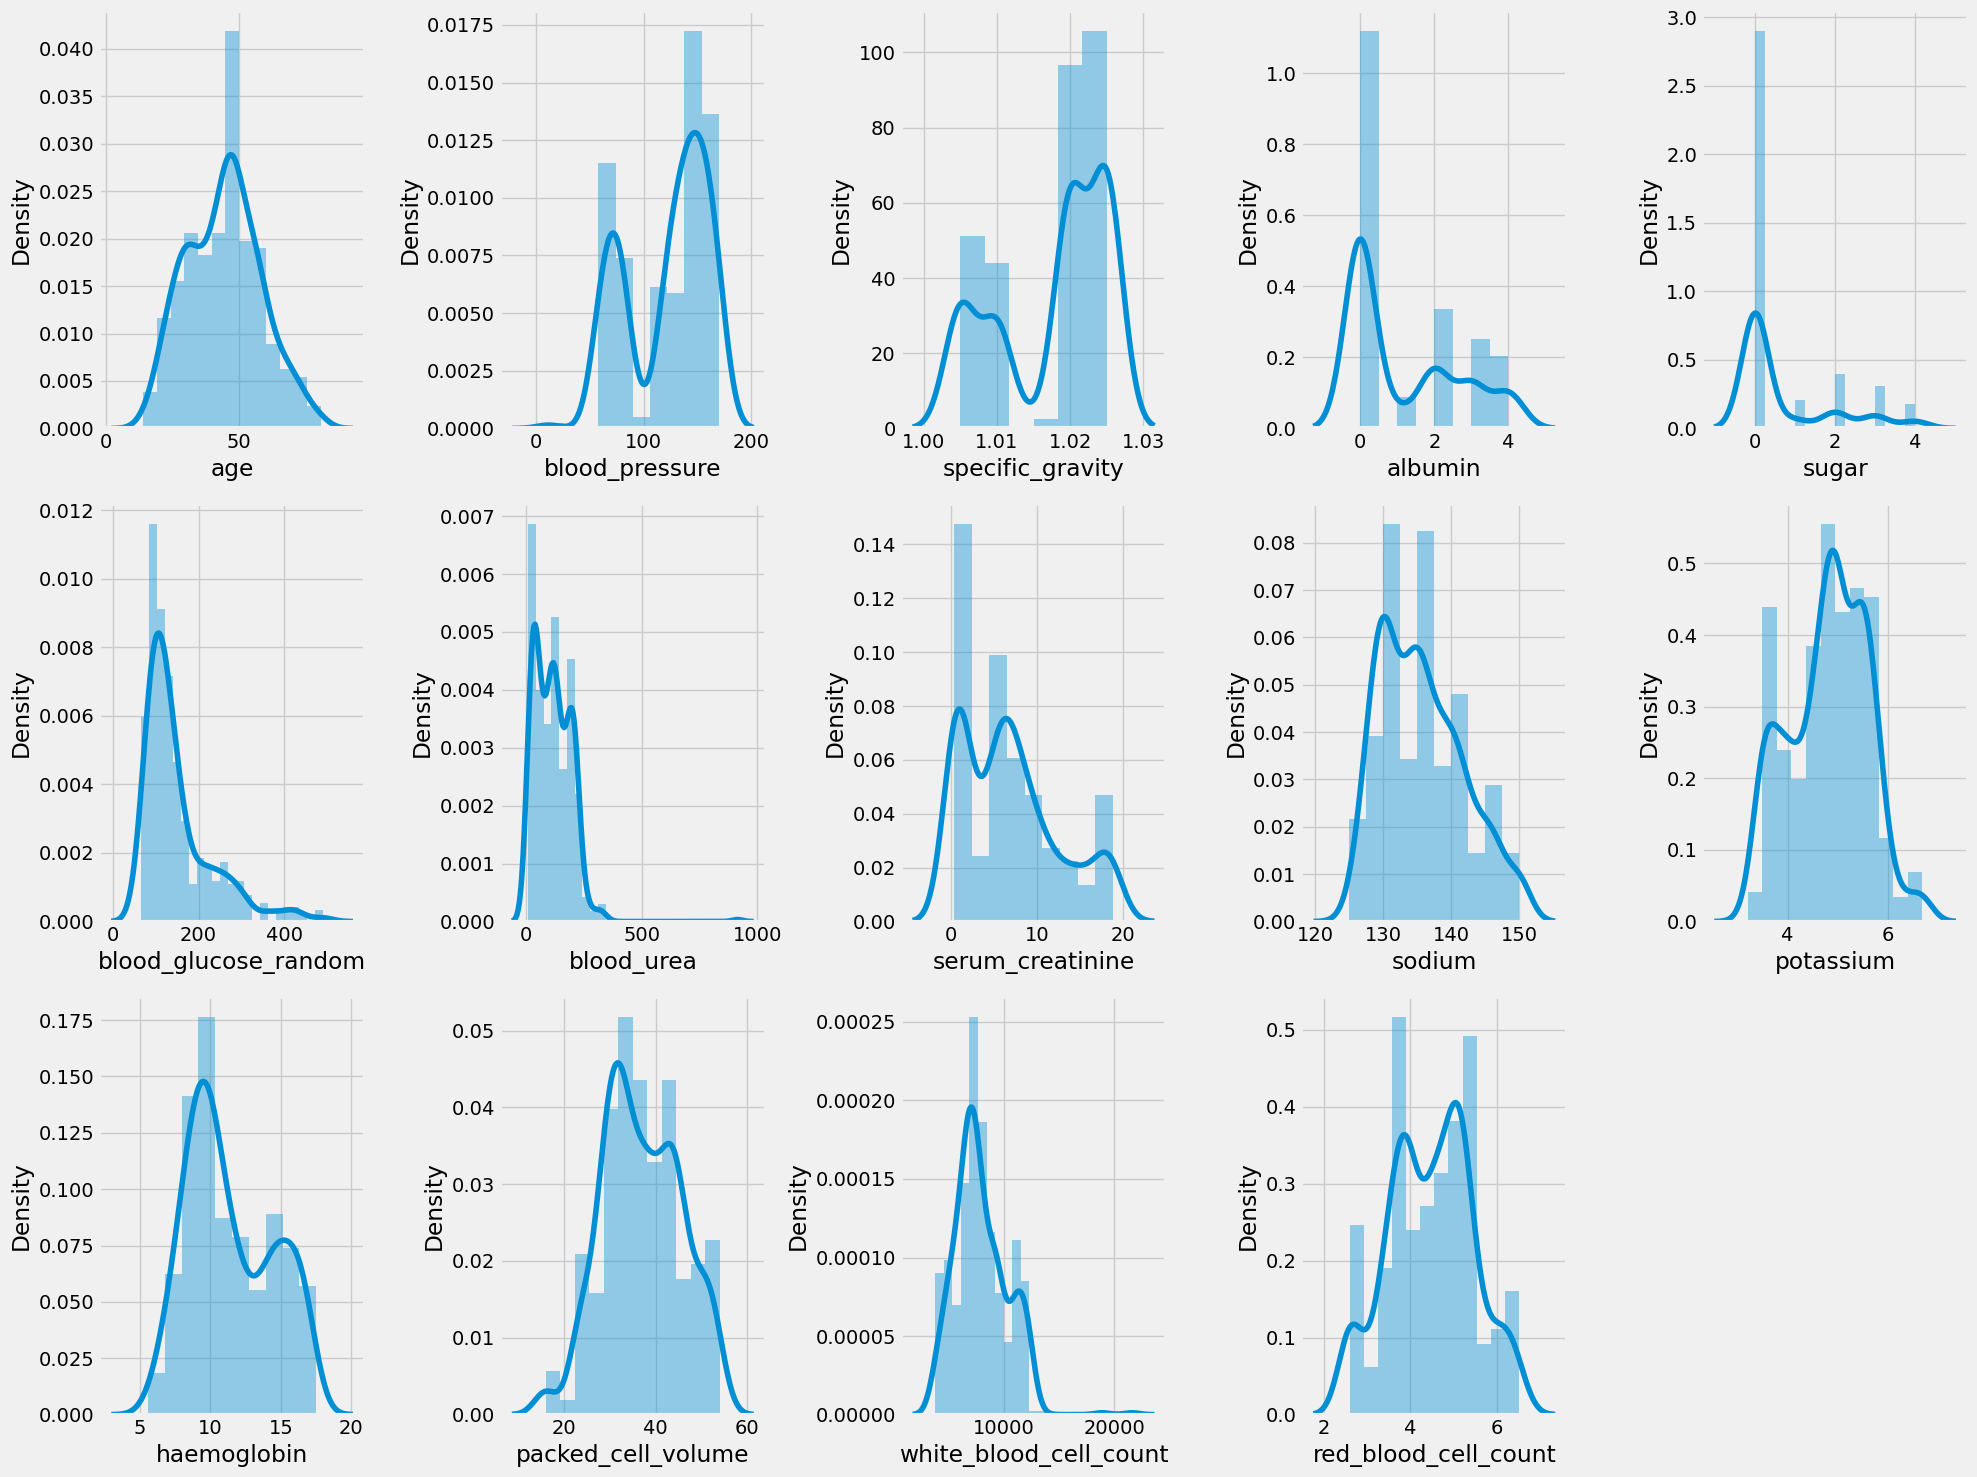

In [21]:
# checking numerical features distribution

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

### Skewness is present in some of the columns.

ValueError: min() arg is an empty sequence

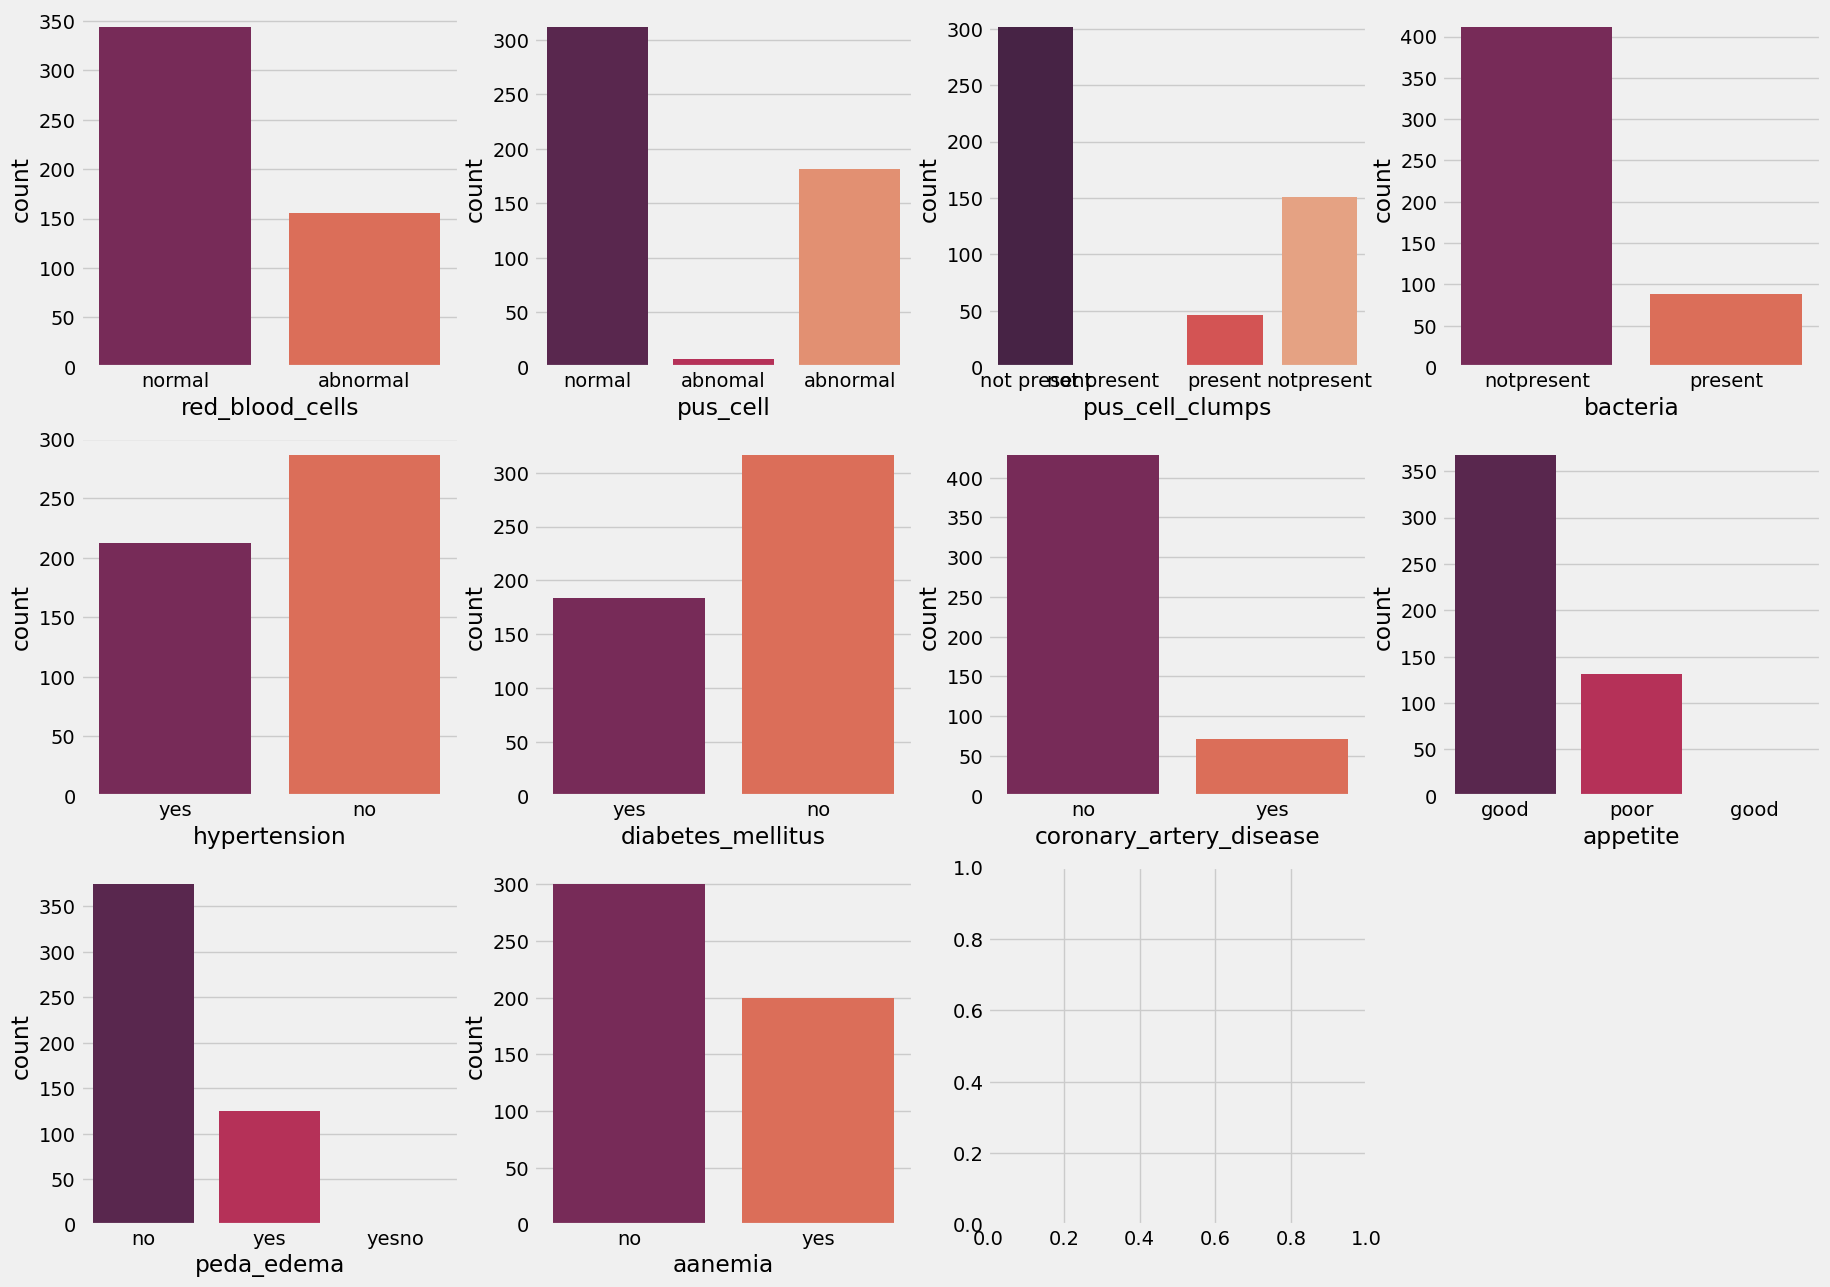

In [22]:
# looking at categorical columns

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(df[column], palette = 'rocket')
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

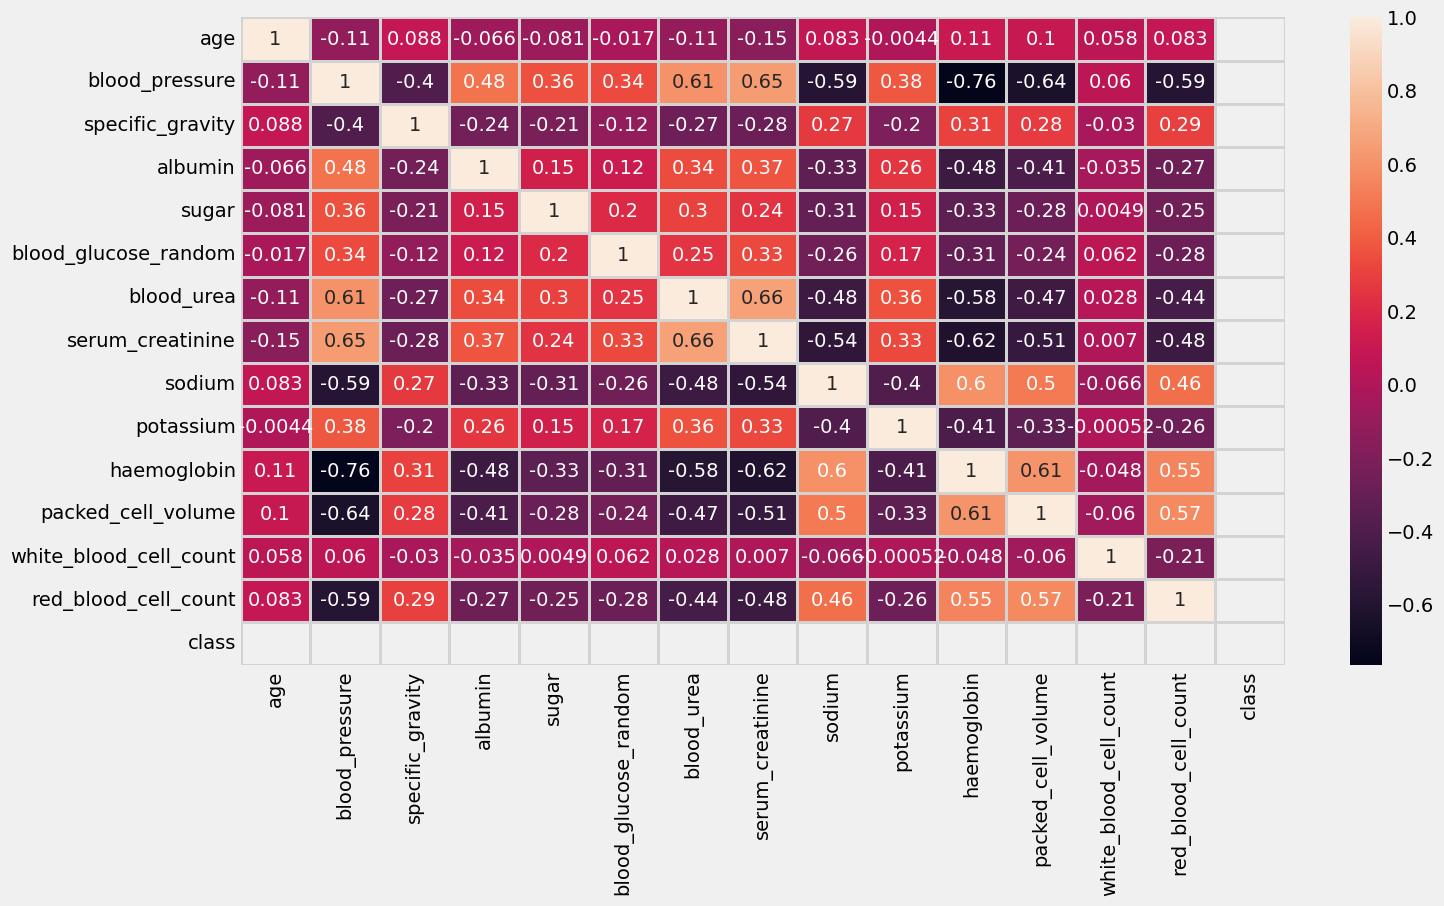

In [23]:
# heatmap of data

plt.figure(figsize = (15, 8))

sns.heatmap(df.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()

In [24]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

## Exploratory Data Analysis (EDA)

In [27]:
# defining functions to create plot

def violin(col):
    fig = px.violin(df, y=col, x="class", color="class", box=True, template = 'plotly_dark')
    return fig.show()

def kde(col):
    grid = sns.FacetGrid(df, hue="class", height = 6, aspect=2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()
    
def scatter(col1, col2):
    fig = px.scatter(df, x=col1, y=col2, color="class", template = 'plotly_dark')
    return fig.show()

In [28]:
violin('red_blood_cell_count')

IndexError: list index out of range

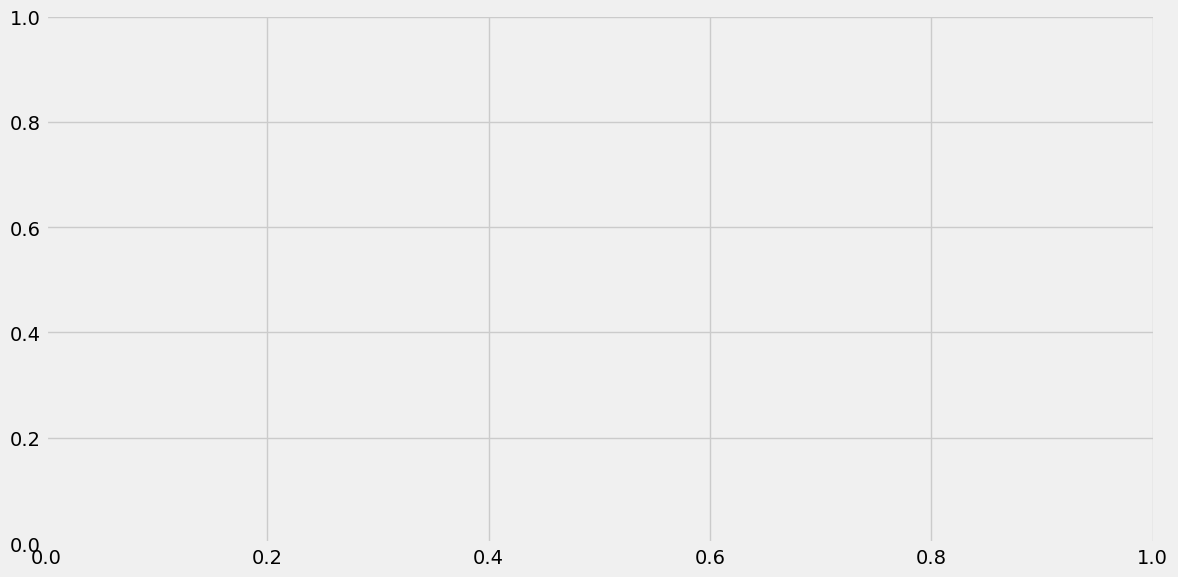

In [29]:
kde('red_blood_cell_count')

## Data Pre Processing

In [30]:
# checking for null values

df.isna().sum().sort_values(ascending = False)

class                      500
hypertension                 2
specific_gravity             1
potassium                    0
aanemia                      0
peda_edema                   0
appetite                     0
coronary_artery_disease      0
diabetes_mellitus            0
red_blood_cell_count         0
white_blood_cell_count       0
packed_cell_volume           0
haemoglobin                  0
age                          0
blood_pressure               0
serum_creatinine             0
blood_urea                   0
blood_glucose_random         0
bacteria                     0
pus_cell_clumps              0
pus_cell                     0
red_blood_cells              0
sugar                        0
albumin                      0
sodium                       0
dtype: int64

In [31]:
df[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          1
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [32]:
df[cat_cols].isnull().sum()

red_blood_cells              0
pus_cell                     0
pus_cell_clumps              0
bacteria                     0
hypertension                 2
diabetes_mellitus            0
coronary_artery_disease      0
appetite                     0
peda_edema                   0
aanemia                      0
class                      500
dtype: int64

In [33]:
# filling null values, we will use two methods, random sampling for higher null values and 
# mean/mode sampling for lower null values

def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [34]:
# filling num_cols null values using random sampling method

for col in num_cols:
    random_value_imputation(col)

In [35]:
df[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [37]:
# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation

random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in cat_cols:
    impute_mode(col)

KeyError: 0

In [38]:
df[cat_cols].isnull().sum()

red_blood_cells              0
pus_cell                     0
pus_cell_clumps              0
bacteria                     0
hypertension                 0
diabetes_mellitus            0
coronary_artery_disease      0
appetite                     0
peda_edema                   0
aanemia                      0
class                      500
dtype: int64

### All the missing values are handeled now, lets do ctaegorical features encding now

## Feature Encoding



In [39]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

red_blood_cells has 2 categories

pus_cell has 3 categories

pus_cell_clumps has 4 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 3 categories

peda_edema has 3 categories

aanemia has 2 categories

class has 0 categories



### As all of the categorical columns have 2 categories we can use label encoder

In [40]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [41]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,40,150,1.020,1,0,1,2,0,0,181,96,8.4,135,4.0,10.3,44,7800,5.2,1,1,0,0,0,0,0
1,45,140,1.020,4,0,1,2,1,0,121,73,7.3,130,5.4,9.4,38,6000,3.9,0,0,0,0,0,1,0
2,16,160,1.020,2,3,1,2,0,0,423,111,7.0,129,4.9,10.6,31,7500,4.6,0,1,0,2,0,0,0
3,18,140,1.005,4,0,1,0,3,0,106,119,11.6,131,5.5,7.2,32,6700,4.4,1,0,0,2,1,1,0
4,51,170,1.010,2,0,1,2,3,0,66,144,16.0,128,5.6,9.6,35,7300,5.0,0,0,0,0,0,1,0


# Model Building

In [42]:
ind_col = [col for col in df.columns if col != 'class']
dep_col = 'class'

X = df[ind_col]
y = df[dep_col]

In [43]:
# splitting data intp training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

# KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of knn

knn_acc = accuracy_score(y_test, knn.predict(X_test))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test))}")

Training Accuracy of KNN is 1.0
Test Accuracy of KNN is 1.0 

Confusion Matrix :- 
[[150]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       150

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



# Decision Tree Classifier



In [45]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 1.0 

Confusion Matrix :- 
[[150]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       150

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



In [46]:
# hyper parameter tuning of decision tree 

from sklearn.model_selection import GridSearchCV
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [47]:
# best parameters and best score

print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
1.0


In [48]:
# best estimator

dtc = grid_search_dtc.best_estimator_

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 1.0 

Confusion Matrix :- 
[[150]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       150

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



# Random Forest Classifier



In [49]:
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rd_clf.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rd_clf.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test))}")

Training Accuracy of Random Forest Classifier is 1.0
Test Accuracy of Random Forest Classifier is 1.0 

Confusion Matrix :- 
[[150]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       150

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



# Ada Boost Classifier



In [50]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = dtc)
ada.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of ada boost

ada_acc = accuracy_score(y_test, ada.predict(X_test))

print(f"Training Accuracy of Ada Boost Classifier is {accuracy_score(y_train, ada.predict(X_train))}")
print(f"Test Accuracy of Ada Boost Classifier is {ada_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, ada.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, ada.predict(X_test))}")

Training Accuracy of Ada Boost Classifier is 1.0
Test Accuracy of Ada Boost Classifier is 1.0 

Confusion Matrix :- 
[[150]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       150

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



# Gradient Boosting Classifier



In [75]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of gradient boosting classifier

gb_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, gb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, gb.predict(X_test))}")

ValueError: y contains 1 class after sample_weight trimmed classes with zero weights, while a minimum of 2 classes are required.

# Stochastic Gradient Boosting (SGB

In [74]:
sgb = GradientBoostingClassifier(max_depth = 4, subsample = 0.90, max_features = 0.75, n_estimators = 200)
sgb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of stochastic gradient boosting classifier

sgb_acc = accuracy_score(y_test, sgb.predict(X_test))

print(f"Training Accuracy of Stochastic Gradient Boosting is {accuracy_score(y_train, sgb.predict(X_train))}")
print(f"Test Accuracy of Stochastic Gradient Boosting is {sgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, sgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, sgb.predict(X_test))}")

ValueError: y contains 1 class after sample_weight trimmed classes with zero weights, while a minimum of 2 classes are required.

# XgBoost

In [55]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 70.9/70.9 MB 5.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [56]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.5, max_depth = 5, n_estimators = 150)
xgb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of xgboost

xgb_acc = accuracy_score(y_test, xgb.predict(X_test))

print(f"Training Accuracy of XgBoost is {accuracy_score(y_train, xgb.predict(X_train))}")
print(f"Test Accuracy of XgBoost is {xgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, xgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, xgb.predict(X_test))}")

Training Accuracy of XgBoost is 1.0
Test Accuracy of XgBoost is 1.0 

Confusion Matrix :- 
[[150]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       150

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



# Cat Boost Classifier

In [58]:
pip install catboost

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 74.0/74.0 MB 4.3 MB/s eta 0:00:00
     ---------------------------------------- 47.0/47.0 kB 2.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [62]:
# from catboost import CatBoostClassifier

# cat = CatBoostClassifier(iterations=10)
# cat.fit(X_train, y_train)

In [63]:
# accuracy score, confusion matrix and classification report of cat boost

# cat_acc = accuracy_score(y_test, cat.predict(X_test))

# print(f"Training Accuracy of Cat Boost Classifier is {accuracy_score(y_train, cat.predict(X_train))}")
# print(f"Test Accuracy of Cat Boost Classifier is {cat_acc} \n")

# print(f"Confusion Matrix :- \n{confusion_matrix(y_test, cat.predict(X_test))}\n")
# print(f"Classification Report :- \n {classification_report(y_test, cat.predict(X_test))}")

# Extra Trees Classifier



In [64]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of extra trees classifier

etc_acc = accuracy_score(y_test, etc.predict(X_test))

print(f"Training Accuracy of Extra Trees Classifier is {accuracy_score(y_train, etc.predict(X_train))}")
print(f"Test Accuracy of Extra Trees Classifier is {etc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, etc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, etc.predict(X_test))}")

Training Accuracy of Extra Trees Classifier is 1.0
Test Accuracy of Extra Trees Classifier is 1.0 

Confusion Matrix :- 
[[150]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       150

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



# LGBM Classifier



In [66]:
pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 1.0/1.0 MB 2.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [69]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(learning_rate = 1)
lgbm.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of lgbm classifier

lgbm_acc = accuracy_score(y_test, lgbm.predict(X_test))

print(f"Training Accuracy of LGBM Classifier is {accuracy_score(y_train, lgbm.predict(X_train))}")
print(f"Test Accuracy of LGBM Classifier is {lgbm_acc} \n")

print(f"{confusion_matrix(y_test, lgbm.predict(X_test))}\n")
print(classification_report(y_test, lgbm.predict(X_test)))

Training Accuracy of LGBM Classifier is 1.0
Test Accuracy of LGBM Classifier is 1.0 

[[150]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



# Models Comparison



In [80]:
models = pd.DataFrame({
    'Model' : [ 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
              'XgBoost', 'Extra Trees Classifier'],
    'Score' : [knn_acc, dtc_acc, rd_clf_acc, ada_acc, xgb_acc, etc_acc]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,KNN,1.0
1,Decision Tree Classifier,1.0
2,Random Forest Classifier,1.0
3,Ada Boost Classifier,1.0
4,XgBoost,1.0
5,Extra Trees Classifier,1.0


In [76]:
# models = pd.DataFrame({
#     'Model' : [ 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
#              'Gradient Boosting Classifier', 'Stochastic Gradient Boosting', 'XgBoost', 'Cat Boost', 'Extra Trees Classifier'],
#     'Score' : [knn_acc, dtc_acc, rd_clf_acc, ada_acc, xgb_acc, etc_acc]
# })


# models.sort_values(by = 'Score', ascending = False)

In [81]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', 
       title = 'Models Comparison')